In [1]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gender

from functions.utils import *
#from functions.env_colors import *
from functions.location import *
from functions.menus import *
from functions.preprocessement import *
from functions.utils import *
from langdetect import detect as langdetector

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#pd.set_option('display.max_rows', None)

In [4]:
data = pd.read_csv('data/restaurants_data_preprocessed_bruno_12.11.2023.csv', index_col=0)

In [5]:
data

,address,averagePrice,chefName,cuisine,currency,customerPhotos/0,customerPhotos/1,customerPhotos/2,customerPhotos/3,customerPhotos/4,customerPhotos/5,customerPhotos/6,customerPhotos/7,customerPhotos/8,customerPhotos/9,customerPhotos/10,customerPhotos/11,customerPhotos/12,customerPhotos/13,customerPhotos/14,customerPhotos/15,customerPhotos/16,customerPhotos/17,customerPhotos/18,customerPhotos/19,description,hasLoyaltyProgram,isBookable,latitude,location,longitude,maxPartySize,name,offer,openingHours,paymentAccepted/0,paymentAccepted/1,paymentAccepted/2,paymentAccepted/3,paymentAccepted/4,paymentAccepted/5,paymentAccepted/6,paymentAccepted/7,paymentAccepted/8,phone,photo,photos/0,photos/1,photos/2,photos/3,photos/4,photos/5,photos/6,photos/7,photos/8,photos/9,photos/10,photos/11,photos/12,photos/13,photos/14,photos/15,photos/16,photos/17,photos/18,photos/19,photos/20,photos/21,photos/22,photos/23,photos/24,photos/25,photos/26,photos/27,photos/28,photos/29,photos/30,photos/31,photos/32,photos/33,photos/34,photos/35,photos/36,photos/37,photos/38,photos/39,photos/40,photos/41,photos/42,photos/43,photos/44,photos/45,photos/46,photos/47,photos/48,photos/49,photos/50,photos/51,photos/52,photos/53,photos/54,photos/55,photos/56,photos/57,photos/58,photos/59,photos/60,photos/61,photos/62,photos/63,photos/64,photos/65,photos/66,photos/67,photos/68,photos/69,photos/70,photos/71,photos/72,photos/73,photos/74,photos/75,photos/76,photos/77,photos/78,photos/79,photos/80,photos/81,photos/82,photos/83,photos/84,photos/85,photos/86,photos/87,photos/88,photos/89,photos/90,radius,ratingValue,reviewCount,reviewList/0/ambienceRatingValue,reviewList/0/date,reviewList/0/foodRatingValue,reviewList/0/ratingValue,reviewList/0/review,reviewList/0/reviewerName,reviewList/0/serviceRatingValue,reviewList/1/ambienceRatingValue,reviewList/1/date,reviewList/1/foodRatingValue,reviewList/1/ratingValue,reviewList/1/review,reviewList/1/reviewerName,reviewList/1/serviceRatingValue,reviewList/2/ambienceRatingValue,reviewList/2/date,reviewList/2/foodRatingValue,reviewList/2/ratingValue,reviewList/2/review,reviewList/2/reviewerName,reviewList/2/serviceRatingValue,reviewList/3/ambienceRatingValue,reviewList/3/date,reviewList/3/foodRatingValue,reviewList/3/ratingValue,reviewList/3/review,reviewList/3/reviewerName,reviewList/3/serviceRatingValue,reviewList/4/ambienceRatingValue,reviewList/4/date,reviewList/4/foodRatingValue,reviewList/4/ratingValue,reviewList/4/review,reviewList/4/reviewerName,reviewList/4/serviceRatingValue,reviewList/5/ambienceRatingValue,reviewList/5/date,reviewList/5/foodRatingValue,reviewList/5/ratingValue,reviewList/5/review,reviewList/5/reviewerName,reviewList/5/serviceRatingValue,reviewList/6/ambienceRatingValue,reviewList/6/date,reviewList/6/foodRatingValue,reviewList/6/ratingValue,reviewList/6/review,reviewList/6/reviewerName,reviewList/6/serviceRatingValue,reviewList/7/ambienceRatingValue,reviewList/7/date,reviewList/7/foodRatingValue,reviewList/7/ratingValue,reviewList/7/review,reviewList/7/reviewerName,reviewList/7/serviceRatingValue,reviewList/8/ambienceRatingValue,reviewList/8/date,reviewList/8/foodRatingValue,reviewList/8/ratingValue,reviewList/8/review,reviewList/8/reviewerName,reviewList/8/serviceRatingValue,reviewList/9/ambienceRatingValue,reviewList/9/date,reviewList/9/foodRatingValue,reviewList/9/ratingValue,reviewList/9/review,reviewList/9/reviewerName,reviewList/9/serviceRatingValue,reviewList/10/ambienceRatingValue,reviewList/10/date,reviewList/10/foodRatingValue,reviewList/10/ratingValue,reviewList/10/review,reviewList/10/reviewerName,reviewList/10/serviceRatingValue,reviewList/11/ambienceRatingValue,reviewList/11/date,reviewList/11/foodRatingValue,reviewList/11/ratingValue,reviewList/11/review,reviewList/11/reviewerName,reviewList/11/serviceRatingValue,reviewList/12/ambienceRatingValue,reviewList/12/date,reviewList/12/foodRatingValue,reviewList/12/ratingValue,reviewList/12/review,reviewList/12/reviewerName,reviewList/12/serviceRat

In [6]:
restaurant_reviews = data[['reviewList/0/ambienceRatingValue','reviewList/0/date', 'reviewList/0/foodRatingValue', 'reviewList/0/ratingValue', 'reviewList/0/review',
 'reviewList/0/reviewerName', 'reviewList/0/serviceRatingValue', 'reviewList/1/ambienceRatingValue', 'reviewList/1/date', 'reviewList/1/foodRatingValue', 'reviewList/1/ratingValue',
 'reviewList/1/review', 'reviewList/1/reviewerName', 'reviewList/1/serviceRatingValue', 'reviewList/2/ambienceRatingValue', 'reviewList/2/date', 'reviewList/2/foodRatingValue',
 'reviewList/2/ratingValue', 'reviewList/2/review', 'reviewList/2/reviewerName', 'reviewList/2/serviceRatingValue', 'reviewList/3/ambienceRatingValue','reviewList/3/date',
 'reviewList/3/foodRatingValue', 'reviewList/3/ratingValue', 'reviewList/3/review', 'reviewList/3/reviewerName', 'reviewList/3/serviceRatingValue', 'reviewList/4/ambienceRatingValue',
 'reviewList/4/date','reviewList/4/foodRatingValue', 'reviewList/4/ratingValue', 'reviewList/4/review', 'reviewList/4/reviewerName', 'reviewList/4/serviceRatingValue',
 'reviewList/5/ambienceRatingValue', 'reviewList/5/date', 'reviewList/5/foodRatingValue', 'reviewList/5/ratingValue', 'reviewList/5/review', 'reviewList/5/reviewerName',
 'reviewList/5/serviceRatingValue', 'reviewList/6/ambienceRatingValue', 'reviewList/6/date', 'reviewList/6/foodRatingValue', 'reviewList/6/ratingValue', 'reviewList/6/review',
 'reviewList/6/reviewerName', 'reviewList/6/serviceRatingValue', 'reviewList/7/ambienceRatingValue', 'reviewList/7/date', 'reviewList/7/foodRatingValue', 'reviewList/7/ratingValue',
 'reviewList/7/review', 'reviewList/7/reviewerName', 'reviewList/7/serviceRatingValue', 'reviewList/8/ambienceRatingValue', 'reviewList/8/date', 'reviewList/8/foodRatingValue',
 'reviewList/8/ratingValue', 'reviewList/8/review', 'reviewList/8/reviewerName', 'reviewList/8/serviceRatingValue', 'reviewList/9/ambienceRatingValue', 'reviewList/9/date',
 'reviewList/9/foodRatingValue', 'reviewList/9/ratingValue', 'reviewList/9/review', 'reviewList/9/reviewerName', 'reviewList/9/serviceRatingValue', 'reviewList/10/ambienceRatingValue',
 'reviewList/10/date', 'reviewList/10/foodRatingValue', 'reviewList/10/ratingValue', 'reviewList/10/review', 'reviewList/10/reviewerName', 'reviewList/10/serviceRatingValue',
 'reviewList/11/ambienceRatingValue', 'reviewList/11/date', 'reviewList/11/foodRatingValue', 'reviewList/11/ratingValue', 'reviewList/11/review', 'reviewList/11/reviewerName',
 'reviewList/11/serviceRatingValue', 'reviewList/12/ambienceRatingValue', 'reviewList/12/date', 'reviewList/12/foodRatingValue', 'reviewList/12/ratingValue', 'reviewList/12/review',
 'reviewList/12/reviewerName', 'reviewList/12/serviceRatingValue', 'reviewList/13/ambienceRatingValue', 'reviewList/13/date', 'reviewList/13/foodRatingValue', 'reviewList/13/ratingValue',
 'reviewList/13/review', 'reviewList/13/reviewerName', 'reviewList/13/serviceRatingValue', 'reviewList/14/ambienceRatingValue', 'reviewList/14/date',
 'reviewList/14/foodRatingValue', 'reviewList/14/ratingValue', 'reviewList/14/review', 'reviewList/14/reviewerName', 'reviewList/14/serviceRatingValue', 'reviewList/15/ambienceRatingValue',
 'reviewList/15/date', 'reviewList/15/foodRatingValue', 'reviewList/15/ratingValue', 'reviewList/15/review', 'reviewList/15/reviewerName', 'reviewList/15/serviceRatingValue',
 'reviewList/16/ambienceRatingValue', 'reviewList/16/date', 'reviewList/16/foodRatingValue', 'reviewList/16/ratingValue', 'reviewList/16/review', 'reviewList/16/reviewerName',
 'reviewList/16/serviceRatingValue', 'reviewList/17/ambienceRatingValue', 'reviewList/17/date', 'reviewList/17/foodRatingValue', 'reviewList/17/ratingValue', 'reviewList/17/review',
 'reviewList/17/reviewerName', 'reviewList/17/serviceRatingValue', 'reviewList/18/ambienceRatingValue', 'reviewList/18/date', 'reviewList/18/foodRatingValue', 'reviewList/18/ratingValue',
 'reviewList/18/review', 'reviewList/18/reviewerName', 'reviewList/18/serviceRatingValue', 'reviewList/19/ambienceRatingValue', 'reviewList/19/date', 'reviewList/19/foodRatingValue',
 'reviewList/19/ratingValue', 'reviewList/19/review', 'reviewList/19/reviewerName', 'reviewList/19/serviceRatingValue']].copy()

In [7]:
print(list(restaurant_reviews.columns))

['reviewList/0/ambienceRatingValue', 'reviewList/0/date', 'reviewList/0/foodRatingValue', 'reviewList/0/ratingValue', 'reviewList/0/review', 'reviewList/0/reviewerName', 'reviewList/0/serviceRatingValue', 'reviewList/1/ambienceRatingValue', 'reviewList/1/date', 'reviewList/1/foodRatingValue', 'reviewList/1/ratingValue', 'reviewList/1/review', 'reviewList/1/reviewerName', 'reviewList/1/serviceRatingValue', 'reviewList/2/ambienceRatingValue', 'reviewList/2/date', 'reviewList/2/foodRatingValue', 'reviewList/2/ratingValue', 'reviewList/2/review', 'reviewList/2/reviewerName', 'reviewList/2/serviceRatingValue', 'reviewList/3/ambienceRatingValue', 'reviewList/3/date', 'reviewList/3/foodRatingValue', 'reviewList/3/ratingValue', 'reviewList/3/review', 'reviewList/3/reviewerName', 'reviewList/3/serviceRatingValue', 'reviewList/4/ambienceRatingValue', 'reviewList/4/date', 'reviewList/4/foodRatingValue', 'reviewList/4/ratingValue', 'reviewList/4/review', 'reviewList/4/reviewerName', 'reviewList/4/

In [8]:
restaurant_reviews.reset_index(inplace=True)

In [9]:
clients2 = pd.melt(restaurant_reviews, id_vars='restaurantID', value_vars= [f'reviewList/{str(i)}/reviewerName' for i in range(20)])

for col in [ 'ambienceRatingValue', 'foodRatingValue', 'date', 'ratingValue', 'review', 'serviceRatingValue']:
    temp = pd.melt(restaurant_reviews, id_vars='restaurantID', value_vars= [f'reviewList/{str(i)}/{col}' for i in range(20)])
    temp.rename(columns={'value': col}, inplace=True)
    clients2 = pd.concat([clients2, temp[col]], axis=1)

clients2.drop(columns=['variable'], inplace=True)
clients2.dropna(how='all', subset=['ambienceRatingValue', 'foodRatingValue', 'date', 'ratingValue', 'review', 'serviceRatingValue'], inplace=True)

In [10]:
clients2.groupby('restaurantID').count()

,value,ambienceRatingValue,foodRatingValue,date,ratingValue,review,serviceRatingValue
restaurantID,,,,,,,
64373,20,20,20,20,20,20,20
64396,20,20,20,20,20,20,20
64398,20,20,20,20,20,20,20
64399,20,20,20,20,20,20,20
64406,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...
807102,1,1,1,1,1,1,1
807157,1,1,1,1,1,1,1
807216,1,1,1,1,1,1,1


In [11]:
clients2.drop(list(clients2[clients2['value'] == '- -'].index), axis=0, inplace=True)

In [12]:
d = gender.Detector()

clients2['gender'] = clients2['value'].apply(lambda x: d.get_gender(x.split()[0].lower().capitalize()))

gender_mapping = {'female': 'female', 'male': 'male', 'mostly_female': 'female', 'mostly_male': 'male', 'andy': 'unknown', 'unknown': 'unknown'}

In [13]:
clients2

,restaurantID,value,ambienceRatingValue,foodRatingValue,date,ratingValue,review,serviceRatingValue,gender
0,730060,Rui Jorge M.,10.0,10.0,2023-08-08T19:30:00.000Z,10.0,"Espaço agradável, simpatia e interacção por pa...",10.0,male
1,805058,Lara P.,8.0,2.0,2023-09-23T20:30:00.000Z,3.5,ninguém gostou,2.0,female
2,712669,Isabel D.,10.0,10.0,2023-09-16T19:30:00.000Z,10.0,Sushi muito fresco e delicioso. Ambiente agra...,10.0,female
3,576521,Thalyta C.,8.0,10.0,2023-09-27T20:00:00.000Z,9.0,Comida excelente,8.0,unknown
4,802974,Rachel B.,6.0,10.0,2023-09-01T18:30:00.000Z,8.5,Bit disappointed that what we ordered wasn't a...,8.0,female
...,...,...,...,...,...,...,...,...,...
30400,741093,Ana Raquel R.,10.0,10.0,2022-08-31T19:00:00.000Z,10.0,Experiência incrível.,10.0,female
30401,65191,Sofia P.,8.0,10.0,2017-07-04T12:30:00.000Z,9.0,The food was really good but I considered it t...,8.0,female
30402,587893,Raphael S.,10.0,8.0,2022-04-24T12:00:00.000Z,8.5,"Bom restaurante, bom ambiente e bom preço.",8.0,male
30406,733529,Bruno R.,10.0,10.0,2022-07-13T19:00:00.000Z,10.0,Comida excelente,10.0,male


In [14]:
visited_restaurants = clients2.groupby('value')['restaurantID'].apply(list)

In [15]:
clients3 = clients2.groupby('value').agg({'gender': 'first', 'restaurantID': 'nunique',
                                          'ambienceRatingValue': 'mean', 'foodRatingValue': 'mean', 'serviceRatingValue': 'mean', 'date': 'count'}).reset_index()

In [16]:
client_reviews = clients2.groupby('value')['review'].apply(list)

In [17]:
clients3 = pd.merge(clients3, visited_restaurants, on='value', how='left')

In [18]:
clients3.rename(columns={'restaurantID_x': 'nb_restaurants_visited', 'restaurantID_y': 'restaurants_visited', 'date':'num_reviews'}, inplace=True)

In [19]:
clients3

,value,gender,nb_restaurants_visited,ambienceRatingValue,foodRatingValue,serviceRatingValue,num_reviews,restaurants_visited
0,- P.,unknown,2,7.333333,8.666667,7.333333,3,"[201820, 201820, 387511]"
1,A c.,unknown,1,6.000000,2.000000,10.000000,1,[528521]
2,A. Ana Rita C.,unknown,1,8.000000,8.000000,10.000000,1,[664311]
3,A. C.,unknown,1,10.000000,4.000000,6.000000,1,[316753]
4,A.C. V.,unknown,1,10.000000,10.000000,10.000000,1,[730838]
...,...,...,...,...,...,...,...,...
11699,Светлана О.,unknown,1,10.000000,10.000000,10.000000,1,[750413]
11700,אורי מ.,unknown,1,10.000000,10.000000,10.000000,1,[590849]
11701,恩瑀 曹,unknown,1,10.000000,10.000000,10.000000,1,[748877]
11702,김 수빈,unknown,1,10.000000,10.000000,10.000000,1,[748296]


In [20]:
clients3 = pd.merge(clients3, client_reviews, on='value', how='left')

In [21]:
clients3.rename(columns={'value': 'reviewer_name'}, inplace=True)

In [22]:
clients3

,reviewer_name,gender,nb_restaurants_visited,ambienceRatingValue,foodRatingValue,serviceRatingValue,num_reviews,restaurants_visited,review
0,- P.,unknown,2,7.333333,8.666667,7.333333,3,"[201820, 201820, 387511]",[⚠️We used to invite our friends to this resta...
1,A c.,unknown,1,6.000000,2.000000,10.000000,1,[528521],[Viande pas fraiche \r\nService ok]
2,A. Ana Rita C.,unknown,1,8.000000,8.000000,10.000000,1,[664311],"[Comida saborosa, tradicional, mas com toque m..."
3,A. C.,unknown,1,10.000000,4.000000,6.000000,1,[316753],[Espaço acolhedor e informal. Batata doce às r...
4,A.C. V.,unknown,1,10.000000,10.000000,10.000000,1,[730838],"[Muito agradável, excelente serviço e proprie..."
...,...,...,...,...,...,...,...,...,...
11699,Светлана О.,unknown,1,10.000000,10.000000,10.000000,1,[750413],"[It was amazing! Food, service, atmosphere ???..."
11700,אורי מ.,unknown,1,10.000000,10.000000,10.000000,1,[590849],[special experience! the concept is special an...
11701,恩瑀 曹,unknown,1,10.000000,10.000000,10.000000,1,[748877],[The food were amazing! It's a great place to ...
11702,김 수빈,unknown,1,10.000000,10.000000,10.000000,1,[748296],[The best restaurant in Faro. As an Asian pers...


In [23]:
def find_average_price(restaurants_visited):
    avg_price = 0
    counter = 0
    for restaurant in restaurants_visited:
        if restaurant in list(data.index):
            restaurant_price = data.loc[restaurant, 'averagePrice']
            avg_price += restaurant_price
            counter += 1
        else:
            pass
    if counter != 0:
        return avg_price/counter
    else:
        return np.nan

In [24]:
clients3['average_price'] = clients3['restaurants_visited'].apply(lambda x: find_average_price(x))

In [25]:
clients3['average_reviews'] = clients3['num_reviews']/clients3['nb_restaurants_visited']

In [26]:
def extract_restaurant_info(restaurants_visited, info):
    info_list = []
    if info == 'coordinates':
        for restaurant in restaurants_visited:
            if restaurant in list(data.index):
                lat = data.loc[restaurant, 'latitude']
                long = data.loc[restaurant, 'longitude']
                info_list.append((lat, long))
            else:
                pass
    else:
        for restaurant in restaurants_visited:
            if restaurant in list(data.index):
                restaurant_info = data.loc[restaurant, info]
                if not pd.isna(restaurant_info):
                    info_list.append(restaurant_info)
            else:
                pass
    return list(set(info_list))

In [27]:
clients3['visited_cuisines'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'cuisine'))
clients3['visited_locations'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'location'))
clients3['visited_style'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'style'))

In [28]:
clients3['visited_coordinates'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'coordinates'))

In [29]:
clients3['midpoint_coordinates'] = clients3['visited_coordinates'].apply(lambda locations: (np.mean([location[0] for location in locations]), np.mean([location[1] for location in locations])))

In [30]:
clients3['review'] = clients3['review'].apply(lambda x: [standardize_text(review) for review in x])

In [31]:
def join_reviews(reviews):
    for i in range(len(reviews)-1):
        if isinstance(reviews[i], type(None)):
            del reviews[i]
    return ' '.join(reviews)

In [32]:
clients3['review_language'] = clients3['review'].apply(lambda x: join_reviews(x))

In [33]:
def detect_language(string_reviews):
    try:
        if isinstance(string_reviews, type(None)):
            return "Not Available"
        elif isinstance(string_reviews, str) and len(string_reviews) >= 30:
            return langdetector(string_reviews)
        else:
            return "Not Available"
    except:
        return "Not Available"

In [34]:
clients3['review_language'] = clients3['review_language'].apply(lambda x: detect_language(x))

In [35]:
#LATITUDES E LONGITUDES ESTRANHAS!
#data[data['longitude']==-99.50084726]

In [36]:
#import folium

# Create a map centered at a specific location
#map_center = [latitude, longitude]  # Replace with the desired center coordinates
#my_map = folium.Map(location=map_center, zoom_start=10)

# Iterate through locations and add markers to the map
#for location in clients['visitedLocations']:
#    for lat, lon in location:
#        folium.Marker([lat, lon]).add_to(my_map)

# Save the map as an HTML file
#my_map.save('my_map.html')

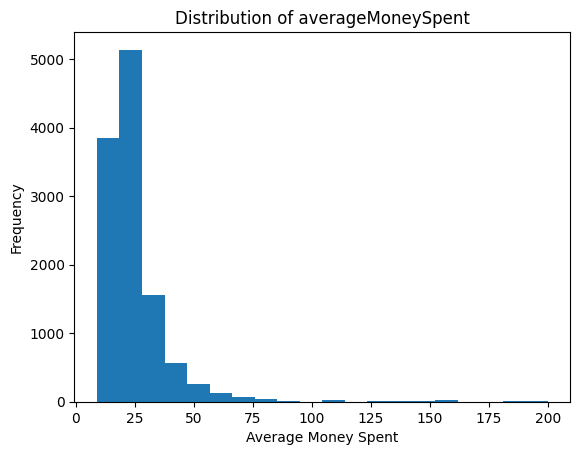

In [37]:
import matplotlib.pyplot as plt

# Plotting a histogram
plt.hist(clients3['average_price'], bins=20)
plt.title('Distribution of averageMoneySpent')
plt.xlabel('Average Money Spent')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Create a new variable 'age' based on a hypothetical relationship
clients3['age'] = (15 + 0.5 * clients3['average_price'] + np.random.normal(-5, 5, len(clients3))).astype(int)

In [39]:
clients3.loc[clients3['age'] > 70, 'age'] = np.random.uniform(50, 70, len(clients3[clients3['age'] > 70])).astype(int)
clients3.loc[clients3['age'] < 15, 'age'] = np.random.uniform(15, 24, len(clients3[clients3['age'] < 15])).astype(int)

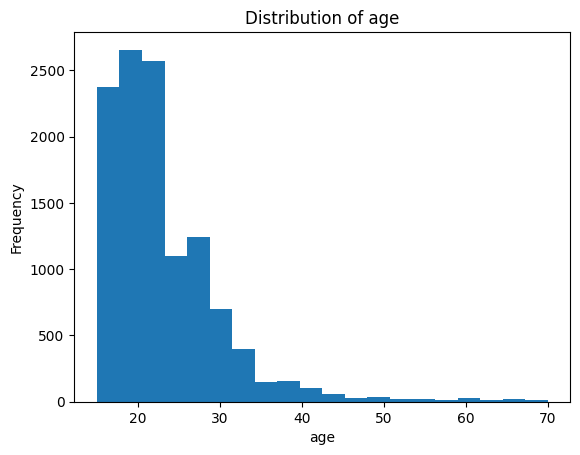

In [40]:
# Plotting a histogram
plt.hist(clients3['age'], bins=20)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [41]:
# https://www.statista.com/statistics/937317/tobacco-smoking-prevalence-globally-by-age/
distributions = [0.142, 0.217, 0.263, 0.285, 0.268, 0.227]


def assign_smoker(age):
    if 15 <= age <= 24:
        return np.random.choice([0, 1], p=[1 - distributions[0], distributions[0]])
    elif 25 <= age <= 34:
        return np.random.choice([0, 1], p=[1 - distributions[1], distributions[1]])
    elif 35 <= age <= 44:
        return np.random.choice([0, 1], p=[1 - distributions[2], distributions[2]])
    elif 45 <= age <= 54:
        return np.random.choice([0, 1], p=[1 - distributions[3], distributions[3]])
    elif 55 <= age <= 64:
        return np.random.choice([0, 1], p=[1 - distributions[4], distributions[4]])
    elif 65 <= age <= 70:
        return np.random.choice([0, 1], p=[1 - distributions[5], distributions[5]])
    else:
        return np.nan  # Handle cases where age is outside specified ranges

# Apply the function to create the "smoker" variable
clients3['smoker'] = clients3['age'].apply(assign_smoker)

In [42]:
clients3.columns

Index(['reviewer_name', 'gender', 'nb_restaurants_visited',
       'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue',
       'num_reviews', 'restaurants_visited', 'review', 'average_price',
       'average_reviews', 'visited_cuisines', 'visited_locations',
       'visited_style', 'visited_coordinates', 'midpoint_coordinates',
       'review_language', 'age', 'smoker'],
      dtype='object')

In [43]:
language_mapping = {'af': 'afrikaans', 'ar': 'arabic', 'bg':'bulgarian', 'bn': 'bengali', 
                    'ca': 'catalan', 'cs': 'czech', 'cy': 'welsh', 
                    'da': 'danish', 'de': 'german', 'el': 'greek',
                    'en': 'english', 'es': 'spanish', 'et': 'estonian',
                    'fa': 'persian', 'fi': 'finnish', 'fr': 'french',
                    'gu': 'gujarati', 'he': 'hebrew', 'hi': 'hindi',
                    'hr': 'croatian', 'hu': 'hungarian', 'id': 'indonesian',
                    'it': 'italian', 'ja': 'japanese', 'kn': 'kannada',
                    'ko': 'korean', 'lt': 'lithuanian', 'lv': 'latvian',
                    'mk': 'macedonian', 'ml': 'malayalam', 'mr': 'marathi',
                    'ne': 'nepali', 'nl': 'dutch', 'no': 'norwegian',
                    'pa': 'punjabi', 'pl': 'polish', 'pt': 'portuguese',
                    'ro': 'romanian', 'ru': 'russian', 'sk': 'slovak',
                    'sl': 'slovene', 'so': 'somali', 'sq': 'albanian',
                    'sv': 'swedish', 'sw': 'swahili', 'ta': 'tamil',
                    'te': 'telugu', 'th': 'thai', 'tl': 'tagalog',
                    'tr': 'turkish', 'uk': 'ukrainian', 'ur': 'urdu',
                    'vi': 'vietnamese', 'zh-cn': 'chinese', 'zh-tw': 'chinese', 'Not Available': np.nan}

In [44]:
clients3['review_language'] = clients3['review_language'].apply(lambda x: language_mapping[x])

In [45]:
clients3['review_language'].value_counts()

review_language
english       5942
portuguese    3579
spanish        552
french         237
italian        230
dutch           35
german          28
catalan         22
swedish         20
afrikaans       11
danish           5
norwegian        4
estonian         2
romanian         2
indonesian       2
albanian         1
croatian         1
slovak           1
welsh            1
turkish          1
Name: count, dtype: int64

# Clustering

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Variáveis que podenos incluir numa solução mais complexa
# 'visited_cuisines', 'visited_locations','visited_style', 'review_language','restaurants_visited'

In [48]:
clients3['visited_coordinates']

0        [(37.09791786, -8.02514232), (37.1242523, -8.5...
1                               [(38.8613708, -9.3750662)]
2                               [(38.7166426, -9.1454985)]
3                               [(40.2035531, -8.4045613)]
4                              [(40.29549408, -7.6703968)]
                               ...                        
11699                           [(41.1481899, -8.6135333)]
11700                         [(41.26236297, -7.57985487)]
11701                           [(38.7105382, -9.1362318)]
11702                           [(37.0148408, -7.9322771)]
11703                          [(37.0881734, -8.25064945)]
Name: visited_coordinates, Length: 11704, dtype: object

In [49]:
# Define a function to apply the transformation rules
def transform_gender(gender):
    if gender in ["andy", "unknown"]:
        return "other"
    elif gender in ["male", "mostly_male"]:
        return "male"
    elif gender in ["female", "mostly_female"]:
        return "female"
    else:
        return "unknown"

# Apply the transformation to the 'gender' column
clients3['transformed_gender'] = clients3['gender'].apply(lambda x: transform_gender(x))

# Perform one-hot encoding on the transformed 'gender' variable
clients3 = pd.get_dummies(clients3, columns=['transformed_gender'], prefix='gender')

# Convert only the relevant columns to integers
clients3['gender_female'] = clients3['gender_female'].astype(int)
clients3['gender_male'] = clients3['gender_male'].astype(int)
clients3['gender_other'] = clients3['gender_other'].astype(int)

In [50]:
# Splitting the 'midpoint_coordinates' column into 'latitude' and 'longitude' columns
clients3[['latitude', 'longitude']] = pd.DataFrame(clients3['midpoint_coordinates'].tolist(), index=clients3.index)

In [51]:
import folium
from folium.plugins import MarkerCluster
import seaborn as sns


# Create a Folium map centered around Portugal
m = folium.Map(location=[39.3999, -8.2245], zoom_start=6)

# Add MarkerCluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the MarkerCluster
for index, row in clients3.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Save the map as an HTML file or display it
m.save('map.html')

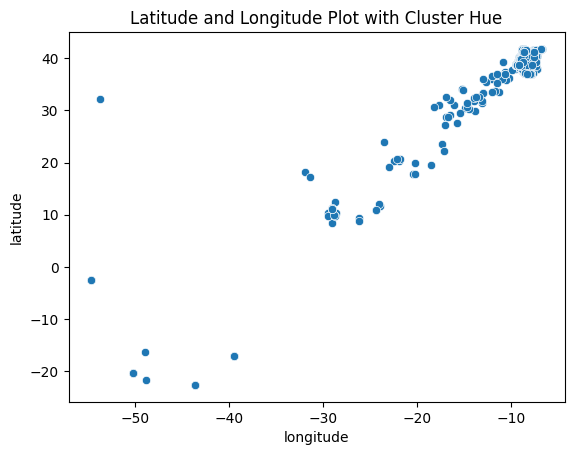

In [52]:
sns.scatterplot(x='longitude', y='latitude', data=clients3)
plt.title('Latitude and Longitude Plot with Cluster Hue')
plt.show()


In [53]:
# Define lower limits for longitude and latitude
min_longitude = -37
min_latitude = 31

# Remove outliers based on the defined lower limits
clients3 = clients3[(clients3['longitude'] >= min_longitude)]
clients3 = clients3[(clients3['latitude'] >= min_latitude)]   


In [54]:
# Create a Folium map centered around Portugal
m = folium.Map(location=[39.3999, -8.2245], zoom_start=6)

# Add MarkerCluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the MarkerCluster
for index, row in clients3.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Save the map as an HTML file or display it
m.save('map2.html')

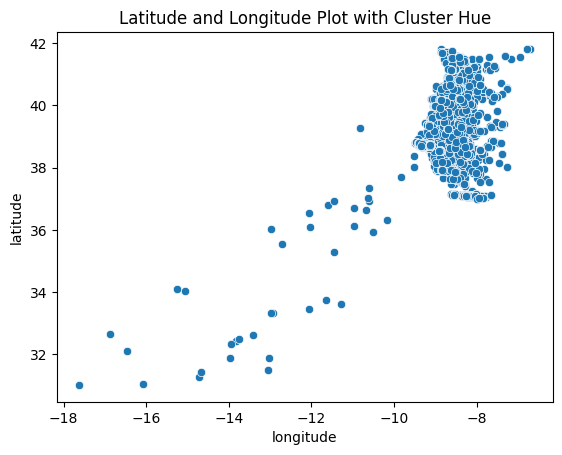

In [55]:
sns.scatterplot(x='longitude', y='latitude', data=clients3)
plt.title('Latitude and Longitude Plot with Cluster Hue')
plt.show()


In [56]:
clients3

,reviewer_name,gender,nb_restaurants_visited,ambienceRatingValue,foodRatingValue,serviceRatingValue,num_reviews,restaurants_visited,review,average_price,average_reviews,visited_cuisines,visited_locations,visited_style,visited_coordinates,midpoint_coordinates,review_language,age,smoker,gender_female,gender_male,gender_other,latitude,longitude
0,- P.,unknown,2,7.333333,8.666667,7.333333,3,"[201820, 201820, 387511]",[we used to invite our friends to this restaur...,60.0,1.5,"[Portuguese, International]","[Ferragudo, Loulé]","[Family, Fine Dining]","[(37.09791786, -8.02514232), (37.1242523, -8.5...","(37.11108508, -8.273678310000001)",english,41,0,0,0,1,37.111085,-8.273678
1,A c.,unknown,1,6.000000,2.000000,10.000000,1,[528521],[viande pas fraiche service ok],14.0,1.0,[Portuguese],[Sintra],[Homemade],"[(38.8613708, -9.3750662)]","(38.8613708, -9.3750662)",NaN,23,0,0,0,1,38.861371,-9.375066
2,A. Ana Rita C.,unknown,1,8.000000,8.000000,10.000000,1,[664311],[comida saborosa tradicional mas com toque mod...,25.0,1.0,[Portuguese],[Lisbon],[Not Available],"[(38.7166426, -9.1454985)]","(38.7166426, -9.1454985)",portuguese,17,0,0,0,1,38.716643,-9.145499
3,A. C.,unknown,1,10.000000,4.000000,6.000000,1,[316753],[espaco acolhedor informal batata doce as rode...,15.0,1.0,[Portuguese],[Coimbra],[Fine Dining],"[(40.2035531, -8.4045613)]","(40.2035531, -8.4045613)",portuguese,16,0,0,0,1,40.203553,-8.404561
4,A.C. V.,unknown,1,10.000000,10.000000,10.000000,1,[730838],[muito agradavel excelente servico proprietari...,20.0,1.0,[Portuguese],[Alvoco da Serra],[Family],"[(40.29549408, -7.6703968)]","(40.29549408, -7.6703968)",portuguese,22,0,0,0,1,40.295494,-7.670397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,Светлана О.,unknown,1,10.000000,10.000000,10.000000,1,[750413],[it was amazing food service atmosphere thanks...,34.0,1.0,[Japanese],[Porto],[Not Available],"[(41.1481899, -8.6135333)]","(41.1481899, -8.6135333)",english,41,1,0,0,1,41.148190,-8.613533
11700,אורי מ.,unknown,1,10.000000,10.000000,10.000000,1,[590849],[special experience the concept is special and...,55.0,1.0,[European],[Sabrosa],[Chill Out],"[(41.26236297, -7.57985487)]","(41.26236297, -7.57985487)",english,40,1,0,0,1,41.262363,-7.579855
11701,恩瑀 曹,unknown,1,10.000000,10.000000,10.000000,1,[748877],[the food were amazing it great place to have ...,14.0,1.0,[International],[Lisbon],[Chill Out],"[(38.7105382, -9.1362318)]","(38.7105382, -9.1362318)",english,19,0,0,0,1,38.710538,-9.136232
11702,김 수빈,unknown,1,10.000000,10.000000,10.000000,1,[748296],[the best restaurant in faro as an asian persp...,21.0,1.0,[International],[Faro],[Chill Out],"[(37.0148408, -7.9322771)]","(37.0148408, -7.9322771)",english,19,1,0,0,1,37.014841,-7.932277


In [69]:
columns_for_clustering = ['gender_female', 'gender_male', 'nb_restaurants_visited', 
                          'num_reviews', 'average_price', 'average_reviews', 
                          'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue',
                          'age', 'smoker', 'latitude', 'longitude']

# Select only the columns you need
data_for_clustering = clients3[columns_for_clustering]

# Standardize the variables
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)


In [70]:
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11637 entries, 0 to 11703
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender_female           11637 non-null  int32  
 1   gender_male             11637 non-null  int32  
 2   nb_restaurants_visited  11637 non-null  int64  
 3   num_reviews             11637 non-null  int64  
 4   average_price           11637 non-null  float64
 5   average_reviews         11637 non-null  float64
 6   ambienceRatingValue     11637 non-null  float64
 7   foodRatingValue         11637 non-null  float64
 8   serviceRatingValue      11637 non-null  float64
 9   age                     11637 non-null  int32  
 10  smoker                  11637 non-null  int32  
 11  latitude                11637 non-null  float64
 12  longitude               11637 non-null  float64
dtypes: float64(7), int32(4), int64(2)
memory usage: 1.1 MB


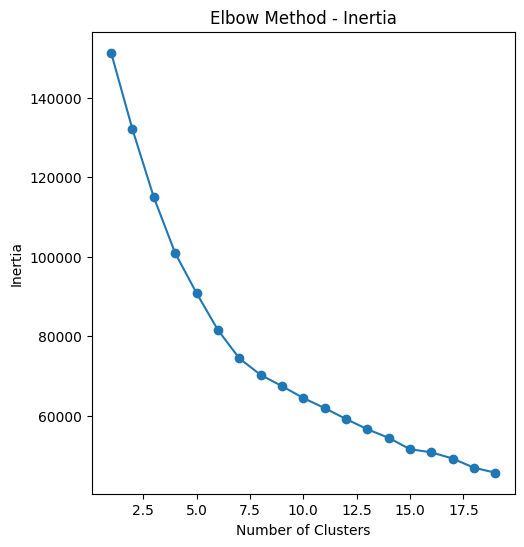

In [71]:
inertia_values = []
possible_clusters = range(1, 20) 

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    
    # Inertia
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(12, 6))

# Inertia
plt.subplot(1, 2, 1)
plt.plot(possible_clusters, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [72]:
# Fit KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_for_clustering_scaled)

# Get cluster labels for the entire dataset
cluster_labels = kmeans.predict(data_for_clustering_scaled)

# Add cluster labels
clients3['Cluster'] = cluster_labels

In [73]:
#Export cluster solution to csv

clients3.to_csv('C:/Users/ASUS/Documents/GitHub/FlavourFlix1/data/clusters.csv', index=False)

#### Cluster analysis

In [74]:
# Import cluster solution
clusters = pd.read_csv('C:/Users/ASUS/Documents/GitHub/FlavourFlix1/data/clusters.csv')

In [75]:
clusters.head()

,reviewer_name,gender,nb_restaurants_visited,ambienceRatingValue,foodRatingValue,serviceRatingValue,num_reviews,restaurants_visited,review,average_price,average_reviews,visited_cuisines,visited_locations,visited_style,visited_coordinates,midpoint_coordinates,review_language,age,smoker,gender_female,gender_male,gender_other,latitude,longitude,Cluster
0,- P.,unknown,2,7.333333,8.666667,7.333333,3,"[201820, 201820, 387511]",['we used to invite our friends to this restau...,60.0,1.5,"['Portuguese', 'International']","['Ferragudo', 'Loulé']","['Family', 'Fine Dining']","[(37.09791786, -8.02514232), (37.1242523, -8.5...","(37.11108508, -8.273678310000001)",english,41,0,0,0,1,37.111085,-8.273678,0
1,A c.,unknown,1,6.000000,2.000000,10.000000,1,[528521],['viande pas fraiche service ok'],14.0,1.0,['Portuguese'],['Sintra'],['Homemade'],"[(38.8613708, -9.3750662)]","(38.8613708, -9.3750662)",NaN,23,0,0,0,1,38.861371,-9.375066,5
2,A. Ana Rita C.,unknown,1,8.000000,8.000000,10.000000,1,[664311],['comida saborosa tradicional mas com toque mo...,25.0,1.0,['Portuguese'],['Lisbon'],['Not Available'],"[(38.7166426, -9.1454985)]","(38.7166426, -9.1454985)",portuguese,17,0,0,0,1,38.716643,-9.145499,2
3,A. C.,unknown,1,10.000000,4.000000,6.000000,1,[316753],['espaco acolhedor informal batata doce as rod...,15.0,1.0,['Portuguese'],['Coimbra'],['Fine Dining'],"[(40.2035531, -8.4045613)]","(40.2035531, -8.4045613)",portuguese,16,0,0,0,1,40.203553,-8.404561,5
4,A.C. V.,unknown,1,10.000000,10.000000,10.000000,1,[730838],['muito agradavel excelente servico proprietar...,20.0,1.0,['Portuguese'],['Alvoco da Serra'],['Family'],"[(40.29549408, -7.6703968)]","(40.29549408, -7.6703968)",portuguese,22,0,0,0,1,40.295494,-7.670397,2


In [76]:
clients3['Cluster'].value_counts()

Cluster
2    5937
1    3797
5     956
0     463
3     344
4     140
Name: count, dtype: int64

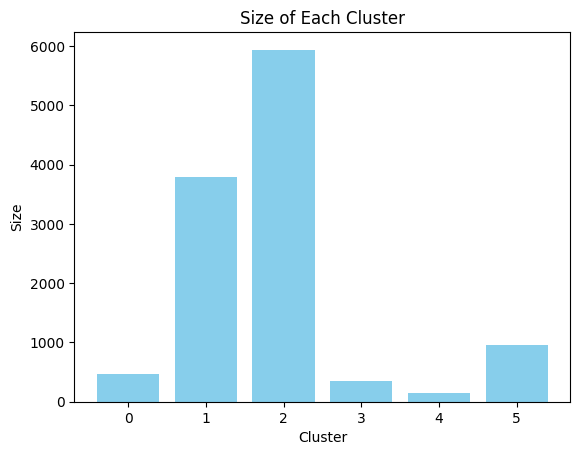

In [77]:
# Group by cluster and calculate the size of each cluster
cluster_sizes = clients3['Cluster'].value_counts()

# Create a bar plot
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Size of Each Cluster')
plt.show()

In [78]:
# Add the 'cluster' column to the list of variables
variables_with_cluster = columns_for_clustering + ['Cluster']

# Set 'cluster' as the index and then group by
grouped_data = clusters[variables_with_cluster].groupby('Cluster').mean()

# Display the grouped data
grouped_data

,gender_female,gender_male,nb_restaurants_visited,num_reviews,average_price,average_reviews,ambienceRatingValue,foodRatingValue,serviceRatingValue,age,smoker,latitude,longitude
Cluster,,,,,,,,,,,,,
0,0.388769,0.496760,1.278618,1.285097,78.805616,1.002520,9.461195,9.594168,9.689777,46.323974,0.375810,38.919479,-8.759288
1,0.000000,1.000000,1.625230,1.643403,23.261151,1.005546,9.337171,9.473094,9.521268,22.188307,0.156703,39.191541,-8.722745
2,0.802762,0.000000,1.524170,1.542025,22.219003,1.005763,9.460550,9.570301,9.614841,21.687216,0.170625,39.224185,-8.728155
3,0.494186,0.491279,14.113372,14.578488,21.666641,1.036216,9.155649,9.279412,9.281370,21.523256,0.151163,38.891134,-9.142051
4,0.464286,0.414286,1.250000,2.550000,21.564453,2.052245,9.583452,9.769167,9.647262,21.992857,0.200000,39.001589,-8.798666
5,0.447699,0.381799,1.160042,1.160042,24.294984,1.000000,5.629015,5.313553,5.233099,22.864017,0.156904,39.011719,-8.774975


In [79]:
clusters[variables_with_cluster].mean()

gender_female              0.481997
gender_male                0.396924
nb_restaurants_visited     1.886311
num_reviews                1.930996
average_price             24.956790
average_reviews            1.018580
ambienceRatingValue        9.098017
foodRatingValue            9.183627
serviceRatingValue         9.217855
age                       22.926442
smoker                     0.172897
latitude                  39.171433
longitude                 -8.744558
Cluster                    1.894217
dtype: float64